In [17]:
%pip install selectivesearch
%pip install torch_snippets

In [18]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

!wget -q https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG -O MyImage.jpg
img = read('MyImage.jpg', 1)

In [19]:
segments_fz = felzenszwalb(img, scale=200)

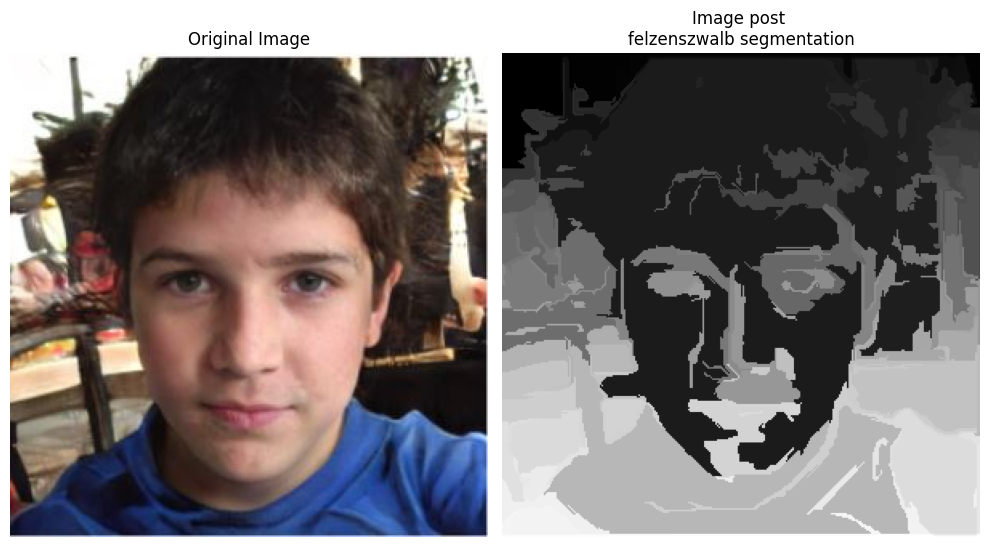

In [20]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

In [21]:
def extract_candidates(img):
  img_lbl, regions=selectivesearch.selective_search(img, scale=200, min_size=100)
  img_area=np.prod(img.shape[:2])
  candidates=[]
  for r in regions:
    if r['rect'] in candidates: continue
    if r['size'] < (0.05 * img_area): continue
    if r['size'] > (1* img_area): continue
    x, y, w, h= r['rect']
    candidates.append(list(r['rect']))
  return candidates

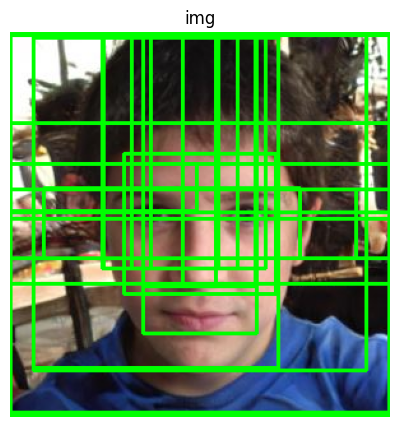

In [22]:
candidates=extract_candidates(img)
show(img, bbs = candidates)



#### IOU Implementation

In [23]:
def IOU(boxA, boxB, epsilon=1e-5):
  # calculating the coordiantes of the box:
  x1=max(boxA[0], boxB[0]) # stores the max value of left most x value between two boxes
  y1=max(boxA[1], boxB[1]) # stores the top-most val
  x2=max(boxA[2], boxB[2]) # right-most
  y2=max(boxA[3], boxB[3])  # bottom-most

  width=(x2-x1)
  height=(y2-y1)

  if(width<0) or (height<0):
    return 0.0
  area_overlap=width*height
  area_a=(boxA[2] - boxA[0]) * (boxA[3]- boxA[1])
  area_b=(boxB[2] - boxB[0]) * (boxB[3]- boxB[1])
  area_combined=area_a+ area_b  - area_overlap

  iou=area_overlap/(area_combined + epsilon)
  return iou